In [22]:
import os
import pickle

# Run local alignment and save the scores from matching pairs
!python local_PEbA.py
!python local_MATRIX.py

# Get list of scores
with open("peba_scores", "rb") as fp:
    peba_scores = pickle.load(fp)
os.remove("peba_scores")

with open("blosum_scores", "rb") as fp:
    blosum_scores = pickle.load(fp)
os.remove("blosum_scores")

2023-03-29 09:11:22.402763: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-29 09:11:23.212801: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-29 09:11:23.212851: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-29 09:11:23.212858: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

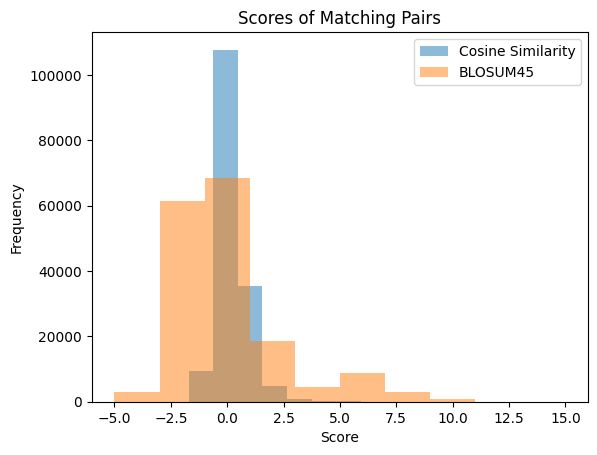

In [21]:
import matplotlib.pyplot as plt

# Plot histogram of scores
plt.hist(peba_scores, bins=10, alpha=0.5, label='Cosine Similarity')
plt.hist(blosum_scores, bins=10, alpha=0.5, label='BLOSUM45')
plt.legend(loc='upper right')
plt.title("Scores of Matching Pairs")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

# Sequences below were 1ad3_A and 1uzb_A (RV11, BB11003)
# First three residues from PEbA used BLOSUM45 scores, gopen/gext = -11/-1, cos_sim *= 10
# PEbA alignment had a PRA of 90.12% for the reference, used cosine similarity score for every residue
# BLOSUM45 alignment had a PRA of 56.94% for the reference

M1: {9: 26.879565217391306, 19: 55.03377567140606, 29: 71.63379790940758, 39: 0, 49: 0, 59: 0, 69: 0, 79: 0, 89: 0, 99: 0}

M2: {9: 3.1834615384615383, 19: 16.1813924050633, 29: 40.68063157894737, 39: 0, 49: 0, 59: 0, 69: 0, 79: 0, 89: 0, 99: 0}


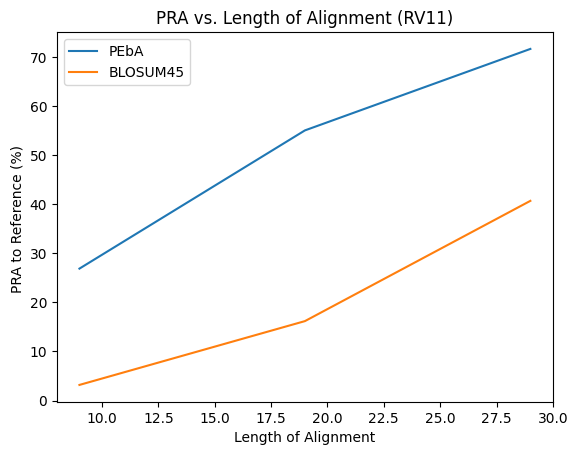

In [1]:
import pickle
import os
import matplotlib.pyplot as plt

# Run comparison script and graph results
!python read_compare.py -p "/home/ben/Desktop/PEbA_Data/Runs/gen3/PEBA-BLOSUM/run5" -t 'id'

# Load dicts from pickle files
with open("compare_dict_m1.pkl", "rb") as fp:
    m1_dict = pickle.load(fp)
with open("compare_dict_m2.pkl", "rb") as fp:
    m2_dict = pickle.load(fp)
os.remove("compare_dict_m1.pkl")
os.remove("compare_dict_m2.pkl")

# Get values from dicts
m1_keys, m2_keys, m1_values, m2_values = [], [], [], []
for key, value in m1_dict.items():
    if value != 0:
        m1_keys.append(key)
        m1_values.append(value)
for key, value in m2_dict.items():
    if value != 0:
        m2_keys.append(key)
        m2_values.append(value)

# Plot results (either Length of Alignment or Pairwise Sequence Identity (%))
comparing = 'Length of Alignment'
reference = 'RV11'
plt.plot(m1_keys, m1_values, label='PEbA')
plt.plot(m2_keys, m2_values, label='BLOSUM45')
plt.legend(loc='upper left')
plt.title(f"PRA vs. {comparing} ({reference})")
plt.xlabel(f"{comparing}")
plt.ylabel("PRA to Reference (%) ")
plt.show()
